In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

In [2]:
import os

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

In [3]:
DATA_PATH = '../../data/mercado-livre-pt-only'
DATASET_FILE = os.path.join(DATA_PATH, 'train-pt-reliable-all-data.csv')
TRAIN_DATASET = os.path.join(DATA_PATH, 'train.csv')
VAL_DATASET = os.path.join(DATA_PATH, 'val.csv')
TEST_DATASET  = os.path.join(DATA_PATH, 'test.csv')

In [4]:
def read_data(filename):
    data = pd.read_csv(filename, sep=",", header=None, names=['utterance','quality', 'language', 'label'])
    return data

In [5]:
data = read_data(DATASET_FILE)

In [6]:
data.head()

,utterance,quality,language,label
0,projeto unidade hidraulica 3000 psi,reliable,portuguese,AIR_COMPRESSORS
1,tapete capacho 120x60 churrasqueira + frete gr...,reliable,portuguese,CARPETS
2,camiseta raglan crepusculo jealous baby look,reliable,portuguese,T_SHIRTS
3,unidade de dvd gravador com defeito apenas par...,reliable,portuguese,DVD_RECORDERS
4,fan dell r320 / r420 0hr6c0 - 24h,reliable,portuguese,DESKTOP_COMPUTER_COOLERS_AND_FANS


In [7]:
data.pop('quality')
data.pop('language')

0         portuguese
1         portuguese
2         portuguese
3         portuguese
4         portuguese
5         portuguese
6         portuguese
7         portuguese
8         portuguese
9         portuguese
10        portuguese
11        portuguese
12        portuguese
13        portuguese
14        portuguese
15        portuguese
16        portuguese
17        portuguese
18        portuguese
19        portuguese
20        portuguese
21        portuguese
22        portuguese
23        portuguese
24        portuguese
25        portuguese
26        portuguese
27        portuguese
28        portuguese
29        portuguese
             ...    
693288    portuguese
693289    portuguese
693290    portuguese
693291    portuguese
693292    portuguese
693293    portuguese
693294    portuguese
693295    portuguese
693296    portuguese
693297    portuguese
693298    portuguese
693299    portuguese
693300    portuguese
693301    portuguese
693302    portuguese
693303    portuguese
693304    por

In [8]:
labels = data['label']
data.head()

,utterance,label
0,projeto unidade hidraulica 3000 psi,AIR_COMPRESSORS
1,tapete capacho 120x60 churrasqueira + frete gr...,CARPETS
2,camiseta raglan crepusculo jealous baby look,T_SHIRTS
3,unidade de dvd gravador com defeito apenas par...,DVD_RECORDERS
4,fan dell r320 / r420 0hr6c0 - 24h,DESKTOP_COMPUTER_COOLERS_AND_FANS


### Remove data from labels containing less then 10 examples:

In [9]:
bytag = data.groupby('label').aggregate(np.count_nonzero)
tags = bytag[bytag.utterance >= 10].index
data = data[data['label'].isin(tags)]

In [10]:
bytag = data.groupby('label').aggregate(np.count_nonzero)
print(bytag.sort_values(by='utterance', ascending=False))

                                    utterance
label                                        
CAR_SEAT_COVERS                          4711
AUTOMOTIVE_SHIFT_LEVER_KNOBS             4689
CAR_ANTENNAS                             4671
FOOTBALL_SHIRTS                          4603
SURVEILLANCE_CAMERAS                     4544
VIDEO_GAMES                              4539
WALLPAPERS                               4423
WRISTWATCHES                             4378
SUNGLASSES                               4375
CARPETS                                  4284
HANDBAGS                                 4250
DOLLS                                    4214
BOOKS                                    4169
LIGHT_BULBS                              4146
RAM_MEMORY_MODULES                       4109
JACKETS_AND_COATS                        4073
MOBILE_DEVICE_CHARGERS                   4017
ACTION_FIGURES                           4001
PANTS                                    3995
COMPUTER_PROCESSORS               

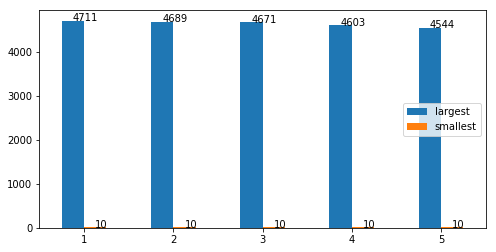

In [11]:
largest_qtys = [4711,4689,4671,4603,4544] 
smallest_qtys = [10,10,10,10,10]
index = [1,2,3,4,5]
df2 = pd.DataFrame({'largest': largest_qtys, 'smallest': smallest_qtys}, index = index)
ax = df2.plot.bar(figsize=(8,4),rot=0)
x_offset = 0
y_offset = 0.2
for p in ax.patches:
    b = p.get_bbox()
    val = "{:.0f}".format(b.y1 + b.y0)        
    ax.annotate(val, ((b.x0 + b.x1)/2 + x_offset, b.y1 + y_offset))
ax.legend(loc=5)  

### Splits dataset into train, test and validation sets

In [13]:
train_posts, test_posts, train_tags, test_tags = train_test_split(data['utterance'], data['label'],
                                                    stratify=data['label'], shuffle=True,
                                                    test_size=0.20)

train_posts, val_posts, train_tags, val_tags = train_test_split(train_posts, train_tags,
                                                    stratify=train_tags, shuffle=True,
                                                    test_size=0.10)



In [14]:
train_posts = train_posts.values.reshape(train_posts.shape[0], 1)
val_posts = val_posts.values.reshape(val_posts.shape[0], 1)
test_posts = test_posts.values.reshape(test_posts.shape[0], 1)

train_tags = train_tags.values.reshape(train_tags.shape[0], 1)
val_tags = val_tags.values.reshape(val_tags.shape[0], 1)
test_tags = test_tags.values.reshape(test_tags.shape[0], 1)

train_dataset = np.hstack([train_posts, train_tags])
val_dataset = np.hstack([val_posts, val_tags])
test_dataset = np.hstack([test_posts, test_tags])

In [15]:
print('train_posts shape: ' + str(train_posts.shape))
print('train_tags shape: ' + str(train_posts.shape))
print('val_posts shape: ' + str(val_posts.shape))
print('val_tags shape: ' + str(val_posts.shape))
print('test_posts shape: ' + str(test_posts.shape))
print('test_tags shape: ' + str(test_tags.shape))
print('train_dataset shape: ' + str(train_dataset.shape))
print('val_dataset shape: ' + str(val_dataset.shape))
print('test_dataset shape: ' + str(test_dataset.shape))

train_posts shape: (498780, 1)
train_tags shape: (498780, 1)
val_posts shape: (55420, 1)
val_tags shape: (55420, 1)
test_posts shape: (138551, 1)
test_tags shape: (138551, 1)
train_dataset shape: (498780, 2)
val_dataset shape: (55420, 2)
test_dataset shape: (138551, 2)


In [16]:
np.savetxt(TRAIN_DATASET, train_dataset,fmt="%s", delimiter=",")
np.savetxt(VAL_DATASET, val_dataset,fmt="%s", delimiter=",")
np.savetxt(TEST_DATASET, test_dataset,fmt="%s", delimiter=",")

###  Sentence size (token number) distribution

No handles with labels found to put in legend.


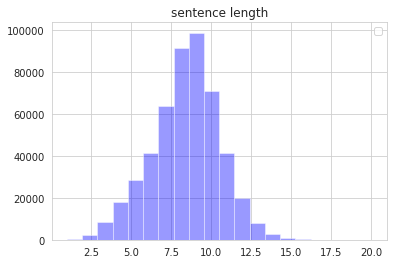

In [18]:
def getSentenceLen(str):
    import re
    try:
        return len(re.findall(r'\w+', str))
    except:
        return 0
    
sns.set_style("whitegrid")
length_checker = np.vectorize(getSentenceLen) 
sentence_len = length_checker(train_posts) 
sns.distplot(sentence_len,bins= 20, hist=True, kde=False, color='b')
#plt.axvline(x=max_seq_len, color='k', linestyle='--', label='max len')
plt.title('sentence length'); plt.legend()
plt.show()


In [19]:
print('max seq len ', sentence_len.max())
print('mean ', sentence_len.mean())
print('std dev ', sentence_len.std())

max seq len  20
mean  8.300996431292353
std dev  2.2333729691447424
